# Import Library



In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Import dan Muat Data Set



In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to match the input shape of the model (28, 28, 1)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 [==============================] - 0s 0us/step


# Definiisikan mode LeNet



In [4]:
def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Buat Model Kompilasi dan Latih



In [5]:
# Create the LeNet model
model = create_lenet_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2353 - accuracy: 0.9284 - val_loss: 0.0957 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0632 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0410 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0385 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0396 -

# Visualisasi Model



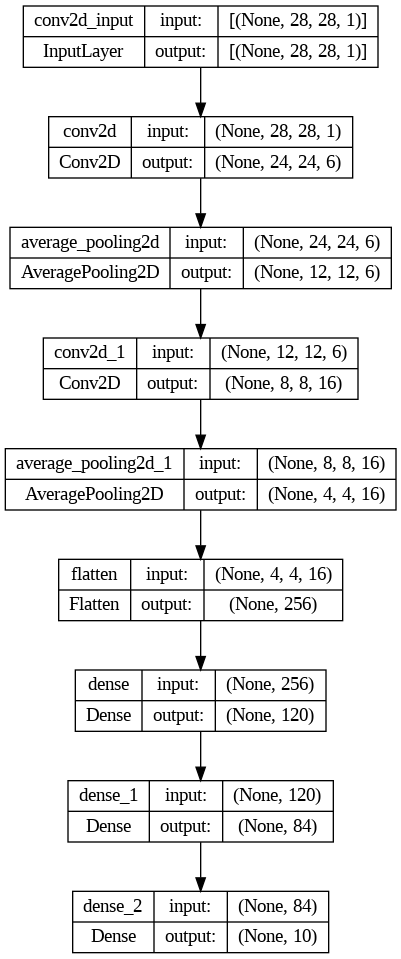

In [6]:

# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)

# Visualisasi Hasil Pelatihan



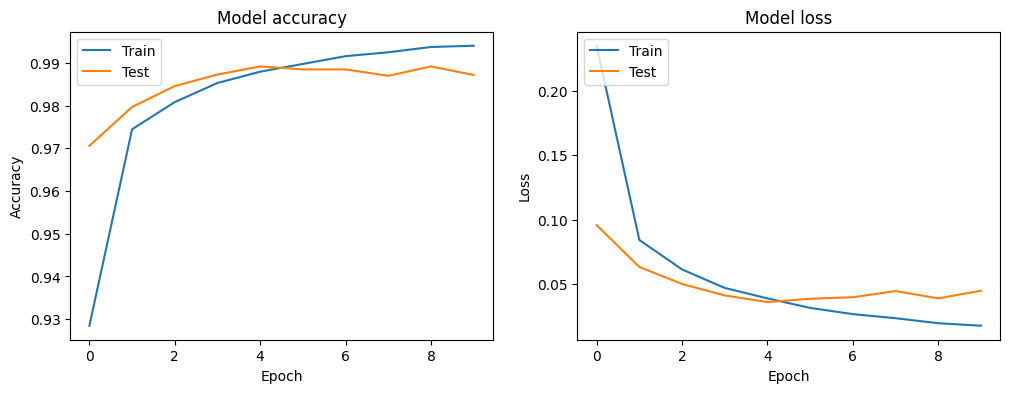

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()